# Business Understanding



# Data Understanding


## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("zillow_data.csv")

In [4]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [5]:
df.iloc[:,160:172]

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12
0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0
1,202400.0,201700.0,201200.0,200700.0,200000.0,199700.0,199700.0,199900.0,200100.0,200200.0,200200.0,200100.0
2,246700.0,246100.0,245800.0,245900.0,246200.0,246800.0,247200.0,247600.0,247900.0,248000.0,248000.0,249000.0
3,1065400.0,1057800.0,1048900.0,1037900.0,1024300.0,1010200.0,999000.0,990900.0,985400.0,983200.0,982400.0,982400.0
4,121600.0,121200.0,120700.0,120300.0,119700.0,119100.0,118700.0,118400.0,118200.0,117900.0,117600.0,117400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14718,190700.0,190500.0,189800.0,188700.0,187500.0,186700.0,186600.0,187100.0,187300.0,187500.0,187700.0,188200.0
14719,207900.0,205400.0,202800.0,200900.0,199200.0,197300.0,196400.0,196400.0,196900.0,197600.0,197900.0,198200.0
14720,107600.0,107800.0,108100.0,108200.0,108300.0,108400.0,108400.0,108200.0,107900.0,107600.0,107000.0,106500.0
14721,645000.0,646100.0,646100.0,646800.0,647400.0,647300.0,643100.0,634700.0,625400.0,616900.0,608200.0,602600.0


In [6]:
df['ROI'] = ((df.iloc[:,260:272].mean(axis=1))/(df.iloc[:,160:172].mean(axis=1))-1)*100

In [7]:
df = df.sort_values(['ROI'], ascending=[False])
df[:10]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1506100,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700,186.643707
1155,62033,11222,New York,NY,New York,Kings,1156,149200.0,148400.0,147500.0,...,1623800,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100,168.108651
5738,97691,94301,Palo Alto,CA,San Jose,Santa Clara,5739,709500.0,711900.0,715000.0,...,4247600,4319300,4401100,4481700,4544700,4595100,4668700,4762600,4818400,167.705936
2470,93200,80010,Aurora,CO,Denver,Arapahoe,2471,70400.0,70800.0,71400.0,...,254000,255700,257700,260600,264000,266500,269500,274100,277600,153.030548
2452,83850,58801,Williston,ND,Williston,Williams,2453,NaN,NaN,NaN,...,231800,233400,233100,231600,229500,228100,227500,226800,226000,148.136450
2054,97693,94303,Palo Alto,CA,San Jose,Santa Clara,2055,374300.0,375900.0,377600.0,...,2456800,2522600,2598400,2647600,2657900,2659800,2683900,2718600,2733900,146.739200
2580,97530,94043,Mountain View,CA,San Jose,Santa Clara,2581,291700.0,294000.0,296400.0,...,1745300,1779800,1812000,1847800,1881900,1915700,1965600,2031800,2074900,146.004988
1791,97527,94040,Mountain View,CA,San Jose,Santa Clara,1792,413200.0,416100.0,419200.0,...,2418700,2478700,2541700,2609400,2669000,2718200,2770500,2820300,2839500,142.983223
2155,93281,80204,Denver,CO,Denver,Denver,2156,72700.0,73200.0,73800.0,...,335300,339500,344100,348300,353000,356800,360800,366600,371600,142.856310
9453,98441,95832,Sacramento,CA,Sacramento,Sacramento,9454,71700.0,71400.0,71200.0,...,244000,245500,245700,245300,246400,248500,249700,249700,248900,142.491144


In [8]:
df['std']=df.loc[:,'2009-01':'2018-04'].std(skipna=True, axis=1)
#Calculate historical mean value
df['mean']=df.loc[:,'2009-01':'2018-04'].mean(skipna=True, axis=1)
#Calculate coefficient of variance
df['CV']=df['std']/df['mean']
#Define upper limit of CV according to risk profile.
upper_cv = df.CV.quantile(.6)
best_ROI = df[df['CV']<upper_cv].sort_values('ROI',axis=0,ascending=False)[:10]
best_ROI

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV
14196,65608,18832,Monroe,PA,Sayre,Bradford,14197,65400.0,65700.0,66000.0,...,124200,124200,124600,124800,124000,123000,44.415205,10525.085558,106157.142857,0.099146
5221,80934,52317,North Liberty,IA,Iowa City,Johnson,5222,NaN,NaN,NaN,...,194800,196200,197500,198600,199800,201000,41.439654,17001.332751,169375.000000,0.100377
13418,64804,16914,Springfield,PA,Sayre,Bradford,13419,69400.0,69800.0,70100.0,...,123800,123700,124600,126400,127200,127200,40.764453,9814.787880,105019.642857,0.093457
6646,91249,76104,Fort Worth,TX,Dallas-Fort Worth,Tarrant,6647,35500.0,35600.0,35700.0,...,76000,76000,76200,77500,80200,81800,40.163934,6318.786658,60527.678571,0.104395
11991,75107,39041,Bolton,MS,Jackson,Hinds,11992,NaN,NaN,NaN,...,128600,130100,131400,130400,126600,123000,39.379145,11283.378590,107884.821429,0.104587
4931,63903,15106,Carnegie,PA,Pittsburgh,Allegheny,4932,69900.0,70100.0,70300.0,...,133800,134600,135600,136600,137500,137700,38.703784,11427.000696,107792.857143,0.106009
12765,91510,76638,Crawford,TX,Waco,McLennan,12766,126500.0,126700.0,127000.0,...,234300,234900,238000,241400,245500,248800,38.103835,19086.593784,192075.892857,0.099370
10686,63434,14131,Ransomville,NY,Buffalo,Niagara,10687,86200.0,85800.0,85400.0,...,159500,160800,162400,164300,165800,166500,37.939845,13077.550591,129503.571429,0.100982
13254,82516,55955,Mantorville,MN,Rochester,Dodge,13255,95400.0,96200.0,97000.0,...,299200,298800,298600,298200,297900,297700,37.768441,25141.544221,240257.142857,0.104644
4254,77016,44116,Rocky River,OH,Cleveland,Cuyahoga,4255,165600.0,165700.0,165800.0,...,259200,260900,263100,265800,267400,267400,37.067005,23153.604765,216275.892857,0.107056


In [9]:
df['USregion'] = df['State']
region_dict = {'CA':'West',
              'OR': 'West',
              'WA': 'West',
              'NV': 'West',
              'ID': 'West',
              'UT': 'West',
              'MT': 'West',
              'WY': 'West',
              'CO': 'West',
               'HI': 'West',
              'AZ': 'SouthWest',
               'NM': 'SouthWest',
               'OK': 'SouthWest',
               'TX': 'SouthWest',
              'ND': 'MidWest',
              'SD': 'MidWest',
              'NE': 'MidWest',
              'KS': 'MidWest',
              'MN': 'MidWest',
              'IA': 'MidWest',
              'MO': 'MidWest',
              'WI': 'MidWest',
              'IL': 'MidWest',
               'IN': 'MidWest',
              'MI': 'MidWest',
              'OH': 'MidWest',
              'AR': 'SouthEast',
              'LA': 'SouthEast',
              'MS': 'SouthEast',
              'AL': 'SouthEast',
              'TN': 'SouthEast',
              'KY': 'SouthEast',
              'WV': 'SouthEast',
              'DC': 'SouthEast',
              'VA': 'SouthEast',
              'NC': 'SouthEast',
              'SC': 'SouthEast',
              'GA': 'SouthEast',
              'FL': 'SouthEast',
              'ME': 'NorthEast',
              'NH': 'NorthEast',
              'VT': 'NorthEast',
              'MA': 'NorthEast',
              'RI': 'NorthEast',
              'CT': 'NorthEast',
              'NY': 'NorthEast',
              'NY': 'NorthEast',
              'NJ': 'NorthEast',
              'PA': 'NorthEast',
              'MD': 'NorthEast',
              'DE': 'NorthEast'}

df.USregion.replace(region_dict, inplace=True)

In [10]:
USregions = df.USregion.value_counts().index.tolist()

In [11]:
for region in USregions:
    df.append(df[df['USregion']=='region'].sort_values('ROI',axis=0,ascending=False)[:1])

In [12]:
a = df[(df['USregion']=='NorthEast')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
a

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
14196,65608,18832,Monroe,PA,Sayre,Bradford,14197,65400.0,65700.0,66000.0,...,124200,124600,124800,124000,123000,44.415205,10525.085558,106157.142857,0.099146,NorthEast


In [13]:
b = df[(df['USregion']=='SouthEast')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
b

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
11991,75107,39041,Bolton,MS,Jackson,Hinds,11992,NaN,NaN,NaN,...,130100,131400,130400,126600,123000,39.379145,11283.37859,107884.821429,0.104587,SouthEast


In [14]:
c = df[(df['USregion']=='MidWest')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
c

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
5221,80934,52317,North Liberty,IA,Iowa City,Johnson,5222,NaN,NaN,NaN,...,196200,197500,198600,199800,201000,41.439654,17001.332751,169375.0,0.100377,MidWest


In [15]:
d = df[(df['USregion']=='SouthWest')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
d

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
6646,91249,76104,Fort Worth,TX,Dallas-Fort Worth,Tarrant,6647,35500.0,35600.0,35700.0,...,76000,76200,77500,80200,81800,40.163934,6318.786658,60527.678571,0.104395,SouthWest


In [16]:
e = df[(df['USregion']=='West')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
e

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
8692,100181,99320,Benton City,WA,Kennewick,Benton,8693,NaN,NaN,NaN,...,186100,186300,186100,185800,185800,35.140892,14616.566005,150027.678571,0.097426,West


In [17]:
frames = [a,b,c,d,e]
result = pd.concat(frames)
result

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
14196,65608,18832,Monroe,PA,Sayre,Bradford,14197,65400.0,65700.0,66000.0,...,124200,124600,124800,124000,123000,44.415205,10525.085558,106157.142857,0.099146,NorthEast
11991,75107,39041,Bolton,MS,Jackson,Hinds,11992,NaN,NaN,NaN,...,130100,131400,130400,126600,123000,39.379145,11283.378590,107884.821429,0.104587,SouthEast
5221,80934,52317,North Liberty,IA,Iowa City,Johnson,5222,NaN,NaN,NaN,...,196200,197500,198600,199800,201000,41.439654,17001.332751,169375.000000,0.100377,MidWest
6646,91249,76104,Fort Worth,TX,Dallas-Fort Worth,Tarrant,6647,35500.0,35600.0,35700.0,...,76000,76200,77500,80200,81800,40.163934,6318.786658,60527.678571,0.104395,SouthWest
8692,100181,99320,Benton City,WA,Kennewick,Benton,8693,NaN,NaN,NaN,...,186100,186300,186100,185800,185800,35.140892,14616.566005,150027.678571,0.097426,West


In [18]:
best_ROI

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV
14196,65608,18832,Monroe,PA,Sayre,Bradford,14197,65400.0,65700.0,66000.0,...,124200,124200,124600,124800,124000,123000,44.415205,10525.085558,106157.142857,0.099146
5221,80934,52317,North Liberty,IA,Iowa City,Johnson,5222,NaN,NaN,NaN,...,194800,196200,197500,198600,199800,201000,41.439654,17001.332751,169375.000000,0.100377
13418,64804,16914,Springfield,PA,Sayre,Bradford,13419,69400.0,69800.0,70100.0,...,123800,123700,124600,126400,127200,127200,40.764453,9814.787880,105019.642857,0.093457
6646,91249,76104,Fort Worth,TX,Dallas-Fort Worth,Tarrant,6647,35500.0,35600.0,35700.0,...,76000,76000,76200,77500,80200,81800,40.163934,6318.786658,60527.678571,0.104395
11991,75107,39041,Bolton,MS,Jackson,Hinds,11992,NaN,NaN,NaN,...,128600,130100,131400,130400,126600,123000,39.379145,11283.378590,107884.821429,0.104587
4931,63903,15106,Carnegie,PA,Pittsburgh,Allegheny,4932,69900.0,70100.0,70300.0,...,133800,134600,135600,136600,137500,137700,38.703784,11427.000696,107792.857143,0.106009
12765,91510,76638,Crawford,TX,Waco,McLennan,12766,126500.0,126700.0,127000.0,...,234300,234900,238000,241400,245500,248800,38.103835,19086.593784,192075.892857,0.099370
10686,63434,14131,Ransomville,NY,Buffalo,Niagara,10687,86200.0,85800.0,85400.0,...,159500,160800,162400,164300,165800,166500,37.939845,13077.550591,129503.571429,0.100982
13254,82516,55955,Mantorville,MN,Rochester,Dodge,13255,95400.0,96200.0,97000.0,...,299200,298800,298600,298200,297900,297700,37.768441,25141.544221,240257.142857,0.104644
4254,77016,44116,Rocky River,OH,Cleveland,Cuyahoga,4255,165600.0,165700.0,165800.0,...,259200,260900,263100,265800,267400,267400,37.067005,23153.604765,216275.892857,0.107056


In [19]:
df[df['ROI'].isna()]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
36,61796,10456,New York,NY,New York,Bronx,37,NaN,NaN,NaN,...,368500,374100,379800,388100,394400,NaN,37040.884987,3.130596e+05,0.118319,NorthEast
105,84613,60611,Chicago,IL,Chicago,Cook,106,NaN,NaN,NaN,...,1486000,1497300,1508600,1508100,1493200,NaN,65209.304805,1.383109e+06,0.047147,MidWest
469,87563,67401,Salina,KS,Salina,Saline,470,NaN,NaN,NaN,...,115500,115500,115500,115400,115400,NaN,7090.423159,1.029633e+05,0.068864,MidWest
713,73596,35758,Madison,AL,Huntsville,Madison,714,NaN,NaN,NaN,...,216100,217700,221000,224700,227500,NaN,11314.366022,2.016141e+05,0.056119,SouthEast
842,70817,30032,Candler-Mcafee,GA,Atlanta,Dekalb,843,NaN,NaN,NaN,...,122300,125400,128600,132800,135900,NaN,25403.366419,7.919483e+04,0.320771,SouthEast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14669,82632,56120,Butterfield,MN,NaN,Watonwan,14670,NaN,NaN,NaN,...,132600,131100,132900,133900,133600,NaN,18735.201215,8.808061e+04,0.212705,MidWest
14674,94662,84726,Escalante,UT,NaN,Garfield,14675,NaN,NaN,NaN,...,179400,178900,178400,177900,177900,NaN,18437.015681,1.497531e+05,0.123116,West
14706,59046,3215,Waterville Valley,NH,Claremont,Grafton,14707,NaN,NaN,NaN,...,796800,808100,811600,806500,796600,NaN,60509.272864,7.455809e+05,0.081157,NorthEast
14707,69681,28039,East Spencer,NC,Charlotte,Rowan,14708,NaN,NaN,NaN,...,25600,25800,26600,27700,28300,NaN,1876.121243,2.828043e+04,0.066340,SouthEast


In [20]:
majorcities = ['New York','Los Angeles','Houston''Chicago','Las Vegas','Houston']

# Step 2: Data Preprocessing

In [21]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

# Step 3: EDA and Visualization

In [22]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

NameError: name 'matplotlib' is not defined

# Step 4: Reshape from Wide to Long Format

In [26]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName','ROI','std','mean','CV','USregion'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [27]:
a_ts=melt_data(a)
a_ts

,value
time,
1996-04-01,65400.0
1996-05-01,65700.0
1996-06-01,66000.0
1996-07-01,66200.0
1996-08-01,66400.0
...,...
2017-12-01,124200.0
2018-01-01,124600.0
2018-02-01,124800.0


In [28]:
b_ts=melt_data(b)
b_ts

,value
time,
2005-07-01,113200.0
2005-08-01,114400.0
2005-09-01,115200.0
2005-10-01,115700.0
2005-11-01,116300.0
...,...
2017-12-01,130100.0
2018-01-01,131400.0
2018-02-01,130400.0


In [29]:
c_ts=melt_data(c)
c_ts

,value
time,
2006-01-01,140500.0
2006-02-01,141500.0
2006-03-01,143200.0
2006-04-01,144900.0
2006-05-01,146700.0
...,...
2017-12-01,196200.0
2018-01-01,197500.0
2018-02-01,198600.0


In [30]:
#red
d_ts=melt_data(d)
d_ts

,value
time,
1996-04-01,35500.0
1996-05-01,35600.0
1996-06-01,35700.0
1996-07-01,35800.0
1996-08-01,35800.0
...,...
2017-12-01,76000.0
2018-01-01,76200.0
2018-02-01,77500.0


In [31]:
#purple

e_ts=melt_data(e)
e_ts

,value
time,
2003-07-01,139800.0
2003-08-01,135400.0
2003-09-01,131800.0
2003-10-01,129200.0
2003-11-01,127700.0
...,...
2017-12-01,186100.0
2018-01-01,186300.0
2018-02-01,186100.0


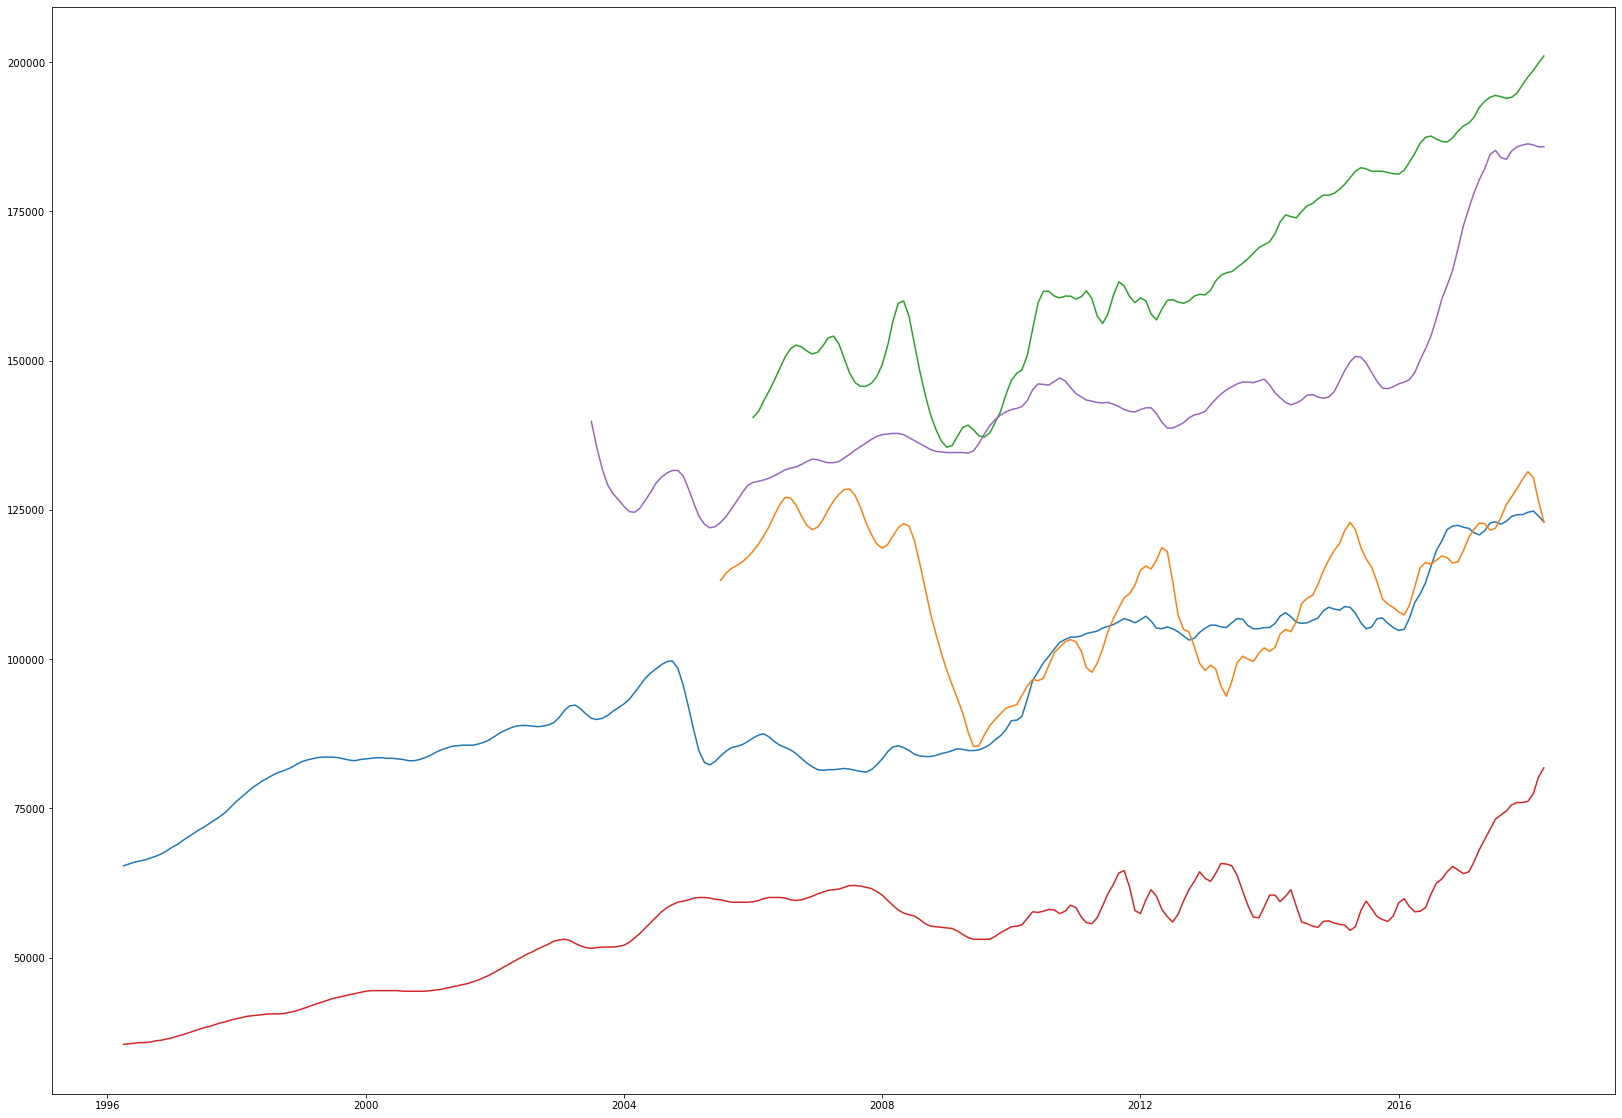

In [32]:
import matplotlib.pyplot as plt
varlist = [a_ts,b_ts,c_ts,d_ts,e_ts]
plt.figure(figsize=(28,20))
for variable in varlist:
    plt.plot(variable)
    

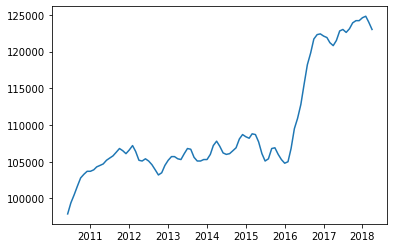

In [33]:
plt.plot(a_ts[170:])

# Testing for Stationarity

In [34]:
#using the rolling mean for each time series

#varlist = [a_ts,b_ts,c_ts,d_ts,e_ts]
#for variable in varlist:
    #rolmean = variable.rolling(window=6, center=False).mean()
    #rolstd = variable.rolling(window=1, center=False).std()


a_diff = a_ts.diff().dropna()  
b_diff = b_ts.diff().dropna()
c_diff = c_ts.diff().dropna()
d_diff = d_ts.diff().dropna()
e_diff = e_ts.diff().dropna()
    

#for i in range(len(dfs_ts)):
 #rolmean = dfs_ts[i].ret.rolling(window = 12, center = False).mean()
 #rolstd = dfs_ts[i].ret.rolling(window = 12, center = False).std()
 #fig = plt.figure(figsize=(11,5))
 #orig = plt.plot(dfs_ts[i].ret, color=’blue’,label=’Original’)
 #mean = plt.plot(rolmean, color=’red’, label=’Rolling Mean’)
 #std = plt.plot(rolstd, color=’black’, label = ‘Rolling Std’)
 #plt.legend(loc=’best’)
 #plt.title(f’Rolling Mean & Standard Deviation for Zipcode: {dfs_ts[i].RegionName[0]}’)
 #plt.show()





In [35]:
from statsmodels.tsa.stattools import adfuller
#A time series Differencing
result = adfuller(a_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Reject the null hypothesis. Data is Stationary')

ADF Statistic: -3.489009
p-value: 0.008274
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Reject the null hypothesis. Data is Stationary


In [36]:
#B time series differencing 
from statsmodels.tsa.stattools import adfuller
#from index 160
result = adfuller(b_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Reject the Null hypothesis. Data is Stationary')

ADF Statistic: -3.851033
p-value: 0.002426
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578
Reject the Null hypothesis. Data is Stationary


In [37]:
from statsmodels.tsa.stattools import adfuller
#c time series differencing
#from index 160
result = adfuller(c_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Reject the Null Hypothesis. Data is Stationary')

ADF Statistic: -3.813225
p-value: 0.002775
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.578
Reject the Null Hypothesis. Data is Stationary


In [38]:
from statsmodels.tsa.stattools import adfuller
#from index 160
result = adfuller(d_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Fail to Reject the Null. Data is not Stationary')

ADF Statistic: -2.384689
p-value: 0.146104
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Fail to Reject the Null. Data is not Stationary


In [39]:
from statsmodels.tsa.stattools import adfuller
#from index 160
result = adfuller(e_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Fail to Reject the Null. Data is not Stationary')

ADF Statistic: -2.361938
p-value: 0.152769
Critical Values:
	1%: -3.471
	5%: -2.880
	10%: -2.576
Fail to Reject the Null. Data is not Stationary


# decomposing time series d and e


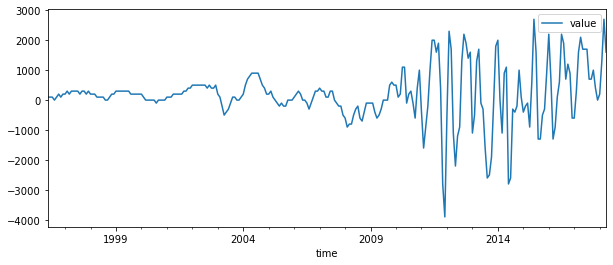

In [40]:
d_diff.plot(figsize=(10, 4));

In [41]:
import numpy as np
#np.log(d_diff).plot(figsize=(10, 4));





In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(d_diff)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

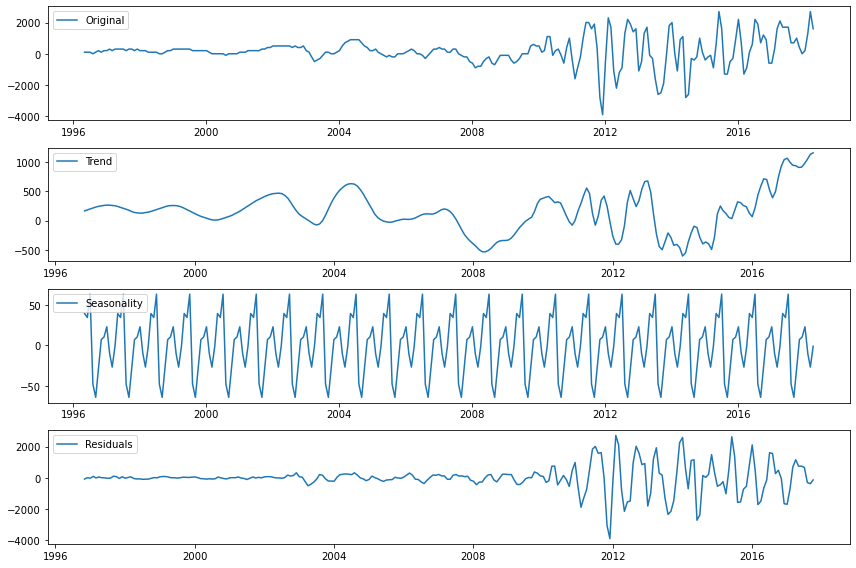

In [43]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(d_diff, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

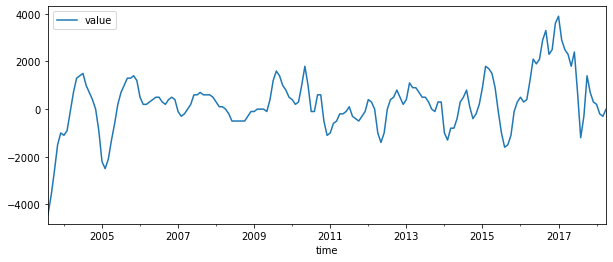

In [44]:
#now let us continue to decomp of e
e_diff.plot(figsize= (10,4));

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(e_diff)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

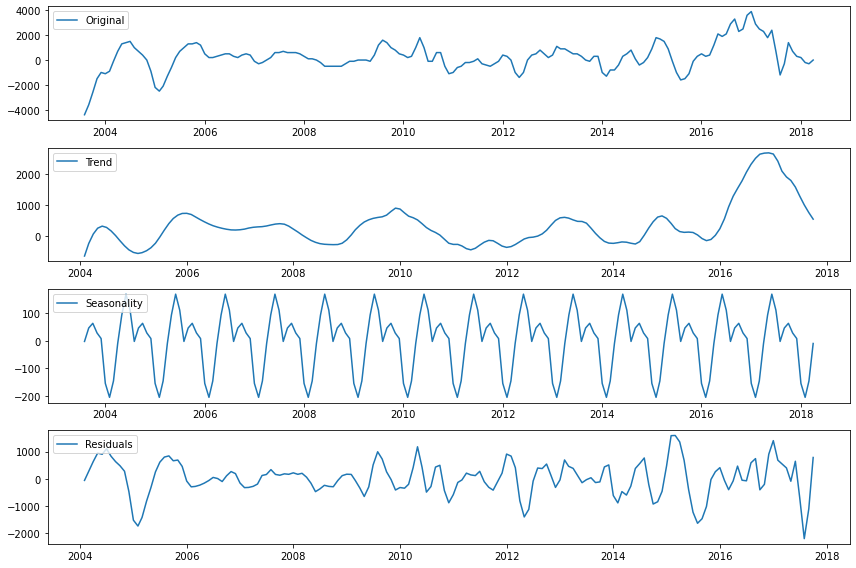

In [46]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(e_diff, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

# Step 5: ARIMA Modeling

In [47]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

import itertools

In [48]:
a_diff.columns

Index(['value'], dtype='object')

In [49]:
#2016 train test split 2017-2018 test
cutoff = "2016-12-01"
cutoff

'2016-12-01'

In [50]:
#train-test split for all 5 time series
train_a = a_diff['2009':cutoff]
test_a = a_diff[cutoff:]
train_b = b_diff['2009':cutoff]
test_b = b_diff[cutoff:]
train_c = c_diff['2009':cutoff]
test_c = c_diff[cutoff:]
train_d = d_diff['2009':cutoff]
test_d = d_diff[cutoff:]
train_e = e_diff['2009':cutoff]

In [51]:
train_with_ind = train_a.reset_index()

In [52]:
train_with_ind.index

RangeIndex(start=0, stop=96, step=1)

In [53]:
#fitting train into ARIMA model
ma_a = ARIMA(train_a, order=(0, 0, 1)).fit()
y_hat_a = ma_a.predict(btyp='levels')
ma_b = ARIMA(train_b, order=(0, 0, 1)).fit()
y_hat_b = ma_b.predict(btyp='levels')
ma_c = ARIMA(train_c, order=(0, 0, 1)).fit()
y_hat_c = ma_c.predict(btyp='levels')

/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('N

# Arima Model B

In [54]:
ma_b = ARIMA(train_b, order=(0, 0, 1)).fit()
y_hat_b = ma_b.predict(btyp='levels')





/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


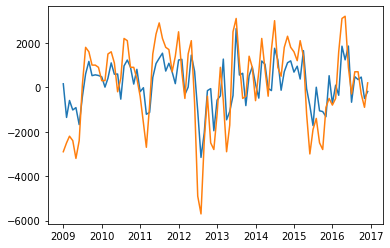

In [55]:
fig, ax = plt.subplots()
ax.plot(y_hat_b)
ax.plot(train_b);

In [56]:
ma_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   96
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -815.774
Date:                Wed, 30 Mar 2022   AIC                           1637.549
Time:                        09:31:00   BIC                           1645.242
Sample:                    01-01-2009   HQIC                          1640.658
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.7159    239.183      0.659      0.510    -311.075     626.507
ma.L1          0.8658      0.061     14.184      0.000       0.746       0.985
sigma2      1.387e+06   2.02e+05      6.858      0.000    9.91e+05    1.78e+06
===================================================================================
Ljung-Box (L1) (Q):                  16.51   Jarque-Bera (JB):                 4.23
Prob(Q):                              0.00   Prob(JB):                         0.12
Heteroskedasticity (H):               1.10   Skew:                            -0.50
Prob(H) (two-sided):                  0.79   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# B with tuned terms

We will not use the auto correlation function as well as the partial auto correlation fucntion to see which tuned terms will allow us to get the lowest AIC. We will also see how this relates to our RMSE which will be our other metric for our baseline model.

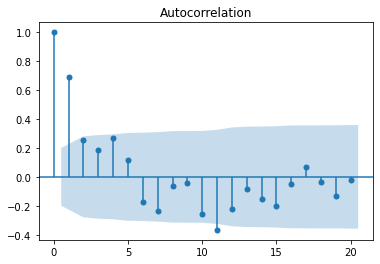

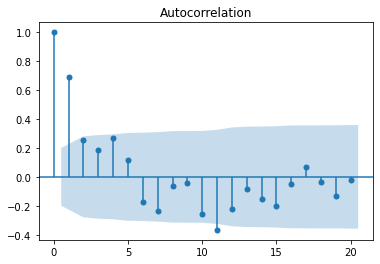

In [57]:
plot_acf(train_b.dropna())

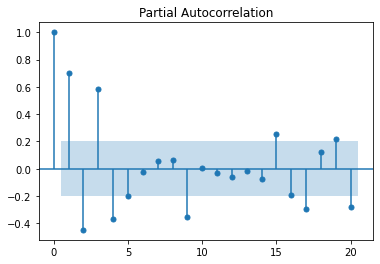

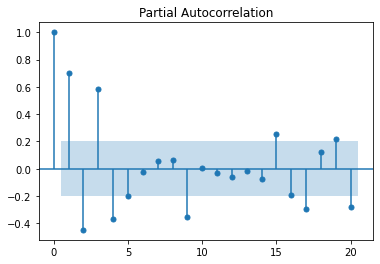

In [58]:
plot_pacf(train_b.dropna())

In [59]:
ma_b1 = ARIMA(train_b, order=(4, 1, 4)).fit()
y_hat_b1 = ma_b.predict(btyp='levels')

/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum 

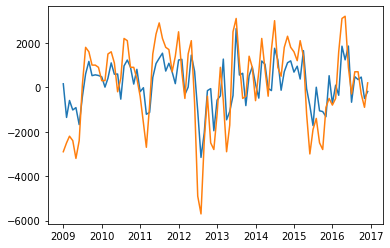

In [60]:
fig, ax = plt.subplots()
ax.plot(y_hat_b1)
ax.plot(train_b);

In [61]:
ma_b1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   96
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -777.566
Date:                Wed, 30 Mar 2022   AIC                           1573.132
Time:                        09:31:05   BIC                           1596.117
Sample:                    01-01-2009   HQIC                          1582.420
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9179      0.276      3.325      0.001       0.377       1.459
ar.L2         -1.1871      0.332     -3.572      0.000      -1.838      -0.536
ar.L3          0.7440      0.310      2.398      0.016       0.136       1.352
ar.L4         -0.0806      0.270     -0.299      0.765      -0.610       0.449
ma.L1         -0.4730      0.343     -1.380      0.168      -1.145       0.199
ma.L2          0.3611      0.326      1.107      0.268      -0.278       1.000
ma.L3         -0.3349      0.258     -1.298      0.194      -0.841       0.171
ma.L4         -0.5226      0.260     -2.007      0.045      -1.033      -0.012
sigma2      9.291e+05   2.55e+05      3.647      0.000     4.3e+05    1.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.94   Prob(JB):                         0.71
Heteroskedasticity (H):               1.33   Skew:                            -0.14
Prob(H) (two-sided):                  0.42   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Baseline Naive B

In [62]:
naive_b = train_b.shift(1)
naive_b

,value
time,
2009-01-01,NaN
2009-02-01,-2900.0
2009-03-01,-2500.0
2009-04-01,-2200.0
2009-05-01,-2400.0
...,...
2016-08-01,-300.0
2016-09-01,700.0
2016-10-01,700.0


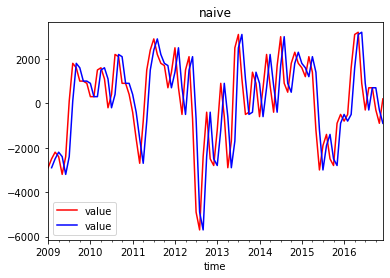

In [63]:
fig, ax = plt.subplots()

train_b[:].plot(ax=ax, c='r', label='original')
naive_b[:].plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

In [64]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(train_b[1:], naive_b.dropna()))

1425.2238974612856

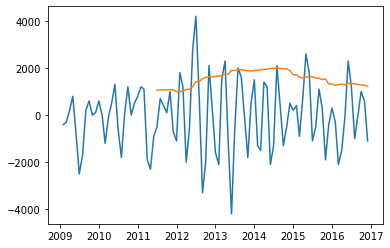

In [65]:
fig, ax = plt.subplots()
residuals = naive_b[1:] - train_b[1:]
ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(30).std());

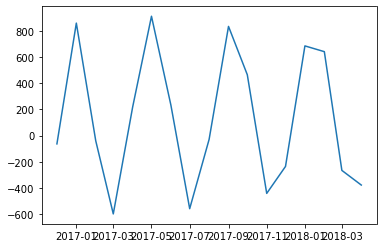

In [66]:
y_hat_test_b = ma_b1.predict(start=test_b.index[0], end=test_b.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(y_hat_test_b);

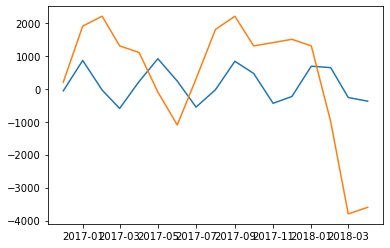

In [67]:
fig, ax = plt.subplots()
ax.plot(y_hat_test_b)
ax.plot(test_b);

In [68]:
print(f'Naive Baseline RSME: {np.sqrt(mean_squared_error(train_b[1:], naive_b.dropna()))}')
print(f'AR(4,1,4) Train RSME: {np.sqrt(mean_squared_error(train_b, y_hat_b))}')
print(f'AR(4,1,4) Test RSME: {np.sqrt(mean_squared_error(test_b, y_hat_test_b))}')

Naive Baseline RSME: 1425.2238974612856
AR(4,1,4) Train RSME: 1201.5208342891615
AR(4,1,4) Test RSME: 1754.7938653616995


# SARIMA Model for Region E

In [74]:
#Train Test Split
train_e = e_diff['2009':cutoff]
test_e = e_diff[cutoff:]

In [75]:
p = q = range(0, 2)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter for SARIMA...')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))

Examples of parameter for SARIMA...
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 1, 0, 12)
SARIMAX: (0, 1, 0) x (1, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (1, 1, 0, 12)
SARIMAX: (0, 1, 1) x (1, 1, 1, 12)
SARIMAX: (1, 1, 0) x (0, 1, 0, 12)
SARIMAX: (1, 1, 0) x (0, 1, 1, 12)
SARIMAX: (1, 1, 0) x (1, 1, 0, 12)
SARIMAX: (1, 1, 0) x (1, 1, 1, 12)
SARIMAX: (1, 1, 1) x (0, 1, 0, 12)
SARIMAX: (1, 1, 1) x (0, 1, 1, 12)
SARIMAX: (1, 1, 1) x (1, 1, 0, 12)
SARIMAX: (1, 1, 1) x (1, 1, 1, 12)


In [76]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=SARIMAX(train_e,
                         order=param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('Oops!')
            continue

/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1335.821171699181
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1095.03913096025
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1118.6704926356474
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1093.629652054462
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1295.678286978767
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1061.603190977159


/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1098.8795053950034


/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1060.9021354092945
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1321.152989524395


/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1084.07976243796
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:1092.4968102429232


/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:1084.0948625245528
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1297.1550869930675


/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:1063.4012907794247
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:1085.7610344798352


/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn

ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1062.823717950887


In [77]:
sari_mod =SARIMAX(train_e,
                  order=(1, 1, 1),
                  seasonal_order=(1, 1, 1, 12),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/samirachatrathi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


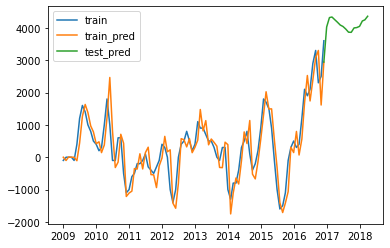

In [79]:
y_hat_train = sari_mod.predict(typ='levels')
y_hat_test = sari_mod.predict(start=test_e.index[0], end=test_e.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(train_e, label='train')
#ax.plot(test_e, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')

plt.legend();

In [80]:
np.sqrt(mean_squared_error(test_e, y_hat_test))

3233.9320052432736

# Step 6: Interpreting Results